In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt


In [2]:
# GPU or CPU device to use
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


In [3]:
Width = 128
Height = 128
K = 20

category = ['Aeroplanes', 'Bicycles', 'Birds', 'Boats', 'Bottles', 
            'Buses', 'Cars', 'Cats', 'Chairs', 'Cows', 
            'Dining tables', 'Dogs', 'Horses', 'Motorbikes', 'People',
            'Potted plants', 'Sheep', 'Sofas',  'Trains', 'TV/Monitors']

In [97]:
from torchvision import datasets, transforms
from PIL import Image, ImageEnhance

class VOCSegmentationAug(datasets.VOCSegmentation):
    def __init__(self, root, year, image_set, download, transform, target_transform):
        super().__init__(root, year, image_set, download, transform, target_transform)
        self.transform = transforms.Compose([transforms.Resize((Height, Width)),
                                             transforms.ToTensor()])
        
    def _rotate(self, x, y):
        rotate = np.random.randint(-90, 90)
        return x.rotate(rotate), y.rotate(rotate)
    
    def _flip(self, x, y):
        p = np.random.uniform(0, 1)
        if p < 0.5:
            return x.transpose(Image.FLIP_TOP_BOTTOM), y.transpose(Image.FLIP_TOP_BOTTOM) 
        else:
            return x, y
        
    def _mirror(self, x, y):
        p = np.random.uniform(0, 1)
        if p < 0.5:
            return x.transpose(Image.FLIP_LEFT_RIGHT), y.transpose(Image.FLIP_LEFT_RIGHT)
        else:
            return x, y
        
    def _brightness(self, x, y):
        p = np.random.uniform(0.5, 1.5)
        enhancer = ImageEnhance.Brightness(x)
        x = enhancer.enhance(p)
        
        return x, y
    
    def _contrast(self, x, y):
        p = np.random.uniform(0.5, 1.5)
        enhancer = ImageEnhance.Contrast(x)
        x = enhancer.enhance(p)
        
        return x, y
    
    def _color(self, x, y):
        p = np.random.uniform(0.5, 1.5)
        enhancer = ImageEnhance.Color(x)
        x = enhancer.enhance(p)
        
        return x, y
    
    def _sharpness(self, x, y):
        p = np.random.uniform(0.5, 1.5)
        enhancer = ImageEnhance.Sharpness(x)
        x = enhancer.enhance(p)
        
        return x, y
     
    def _transform(self, x, y):
        return self.transform(x), self.transform(y)
        
    def __getitem__(self, index):
        x, y = super().__getitem__(index)
        x, y = self._brightness(x, y)
        x, y = self._contrast(x, y)
        x, y = self._sharpness(x, y)
        x, y = self._color(x, y)
        
        x, y = self._rotate(x, y)
        x, y = self._flip(x, y)
        x, y = self._mirror(x, y)
        x, y = self._transform(x, y)
        y = (y * 255).long()[0]
        
        return x, y
                                   
train_data = VOCSegmentationAug(root='voc', year='2012', image_set='train', 
                               download=True, 
                               transform=None, 
                               target_transform=None)        


Using downloaded and verified file: voc/VOCtrainval_11-May-2012.tar


In [104]:
x, y = train_data[0]

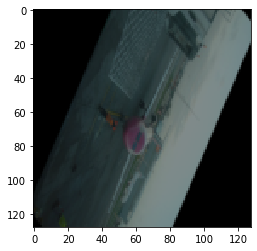

In [105]:
_x = np.array(x)

plt.imshow(_x.transpose(1, 2, 0))
plt.show()

In [106]:
!nvidia-smi

Tue Aug 11 23:14:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 440.59       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:68:00.0 Off |                  N/A |
| 40%   54C    P2   242W / 260W |   3286MiB / 11016MiB |     96%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  